<a href="https://colab.research.google.com/github/sasireddyvari/Income_Class_Prediction/blob/master/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/Projects/Deloitte/deloite.zip" -d '/content/drive/MyDrive/Colab Notebooks/Projects/Deloitte'

**LifeCycle of a Data Science Project:**
- Data Analysis
- Feature Engineering
- Feature Selection
- Model Building
- Model Deployment

**Data Analysis Phase:**

- Missing Values
- All The Numerical Variables
- Categorical Variables
- Cardinality of Categorical Variables
- Outliers
- Relationship between independent and dependent feature(Income)


In [ ]:
!pip install sweetviz

     |████████████████████████████████| 15.1MB 315kB/s 
     |████████████████████████████████| 81kB 9.2MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [ ]:
import pandas as pd
import numpy as np
import sweetviz
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#sns.set(style = 'darkgrid')

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/data_practice/deloite/data_delottie.csv')
data.head()

,Unnamed: 0,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,Male,2174.0,0.0,40.0,United-States,<=50K
1,1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,NaN,Husband,Male,0.0,0.0,13.0,United-States,<=50K
2,2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,Male,0.0,0.0,40.0,United-States,<=50K
3,3,53.0,Private,NaN,NaN,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Male,0.0,NaN,40.0,United-States,<=50K
4,4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,NaN,0.0,0.0,40.0,Cuba,<=50K


In [ ]:
data.shape

(40935, 15)

In [ ]:
data.dtypes

Unnamed: 0         int64
Age              float64
WorkClass         object
fnlwgt           float64
Education         object
EducationNum     float64
MaritalStatus     object
Occupation        object
Relationship      object
Gender            object
CapitalGain      float64
CapitalLoss      float64
HoursPerWeek     float64
NativeCountry     object
Income            object
dtype: object

In [ ]:
# Convert class variable to numeric
data['Income'].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [ ]:
data['Income'].value_counts()

 <=50K     21121
 <=50K.    10002
 >50K       6719
 >50K.      3093
Name: Income, dtype: int64

In [ ]:
data['Income'].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [ ]:
test=' Sha'
def s(x):
  if x=='Sha':
    print('Space is Ignored')
  else:
    print('Space is not Ignored')

s(test)

Space is not Ignored


In [ ]:
def Income_to_numeric(val):
  if val==' <=50K' or val==' <=50K.':
    return 1
  else:
    return 0

In [ ]:
data['Income_Num'] = data['Income'].apply(Income_to_numeric)

In [ ]:
data.head()

,Unnamed: 0,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income,Income_Num
0,0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,Male,2174.0,0.0,40.0,United-States,<=50K,1
1,1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,NaN,Husband,Male,0.0,0.0,13.0,United-States,<=50K,1
2,2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,Male,0.0,0.0,40.0,United-States,<=50K,1
3,3,53.0,Private,NaN,NaN,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Male,0.0,NaN,40.0,United-States,<=50K,1
4,4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,NaN,0.0,0.0,40.0,Cuba,<=50K,1


In [ ]:
data['Income_Num'].unique()

array([1, 0])

In [ ]:
data['Income_Num'].value_counts()

1    31123
0     9812
Name: Income_Num, dtype: int64

**Visualize through sweetviz**

In [ ]:
report=sweetviz.analyze([data,'Data'],target_feat='Income_Num')

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
pwd

'/content'

In [ ]:
report.show_html('/content/SWEETVIZ_REPORT.html')

Report /content/SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**Missing Data**

In [ ]:
data.isnull().sum()

Unnamed: 0          0
Age              2741
WorkClass        2789
fnlwgt           2786
Education        2743
EducationNum     2803
MaritalStatus    2924
Occupation       2759
Relationship     2815
Gender           2727
CapitalGain      2806
CapitalLoss      2718
HoursPerWeek     2680
NativeCountry    2729
Income              0
Income_Num          0
dtype: int64

In [ ]:
features_na=[feature for feature in data.columns if data[feature].isnull().sum()>1]
features_na

['Age',
 'WorkClass',
 'fnlwgt',
 'Education',
 'EducationNum',
 'MaritalStatus',
 'Occupation',
 'Relationship',
 'Gender',
 'CapitalGain',
 'CapitalLoss',
 'HoursPerWeek',
 'NativeCountry']

In [ ]:
data['Age'].isnull().mean()

0.06695981433980701

In [ ]:
for feature in features_na:
  print(feature, np.round(data[feature].isnull().mean() * 100, 4),  ' % missing values')

Age 6.696  % missing values
WorkClass 6.8132  % missing values
fnlwgt 6.8059  % missing values
Education 6.7009  % missing values
EducationNum 6.8474  % missing values
MaritalStatus 7.143  % missing values
Occupation 6.74  % missing values
Relationship 6.8768  % missing values
Gender 6.6618  % missing values
CapitalGain 6.8548  % missing values
CapitalLoss 6.6398  % missing values
HoursPerWeek 6.547  % missing values
NativeCountry 6.6667  % missing values


**Cleaning**

In [ ]:
type(data['Age'].value_counts())

pandas.core.series.Series

In [ ]:
print(data['Age'].value_counts())

36.0    1048
23.0    1042
33.0    1037
37.0    1035
35.0    1033
        ... 
88.0       6
85.0       3
87.0       3
89.0       2
86.0       1
Name: Age, Length: 74, dtype: int64


In [ ]:
data['Age'].value_counts()

36.0    1048
23.0    1042
33.0    1037
37.0    1035
35.0    1033
        ... 
88.0       6
85.0       3
87.0       3
89.0       2
86.0       1
Name: Age, Length: 74, dtype: int64

In [ ]:
cols=[]
val=[]
for feature in data:
  val.append(data[feature].unique())
  cols.append(feature)

df=pd.DataFrame(val,index=cols).transpose()

In [ ]:
df=df.replace(np.nan,0)

In [ ]:
df.drop('Unnamed: 0', axis=1) # 0 or Index 1 or columns

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income,Income_Num
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,Male,2174.0,0.0,40.0,United-States,<=50K,1
1,50.0,Self-emp-not-inc,83311.0,HS-grad,9.0,Married-civ-spouse,0,Husband,0,0.0,0.0,13.0,Cuba,>50K,0
2,38.0,Private,215646.0,0,7.0,Divorced,Handlers-cleaners,Wife,Female,14084.0,2042.0,16.0,0,<=50K.,0
3,53.0,0,0.0,Masters,14.0,Married-spouse-absent,Prof-specialty,0,0,0.0,1408.0,45.0,Jamaica,>50K.,0
4,28.0,Local-gov,338409.0,Assoc-voc,5.0,0,Exec-managerial,Own-child,0,5013.0,1902.0,50.0,India,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27835,0.0,0,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,0,0,0
27836,0.0,0,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,0,0,0
27837,0.0,0,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,0,0,0
27838,0.0,0,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,0,0,0


In [ ]:
# Check for garbage values
for feature in data:
  print(data[feature].unique())

[    0     1     2 ... 32558 32559 32560]
[39. 50. 38. 53. 28. 37. 49. 52. 31. 42. nan 23. 32. 40. 25. 54. 43. 59.
 56. 19. 45. 30. 22. 48. 21. 24. 44. 41. 47. 35. 29. 79. 27. 18. 46. 33.
 57. 34. 76. 20. 36. 55. 61. 70. 64. 71. 68. 66. 51. 58. 26. 60. 90. 17.
 65. 77. 62. 67. 80. 72. 69. 73. 63. 81. 78. 88. 75. 74. 82. 83. 84. 85.
 86. 87. 89.]
[' State-gov' ' Self-emp-not-inc' ' Private' nan ' Local-gov' ' ?'
 ' Federal-gov' ' Self-emp-inc' ' Never-worked' ' Without-pay']
[ 77516.  83311. 215646. ...  89686. 350977. 374983.]
[' Bachelors' ' HS-grad' nan ' Masters' ' Assoc-voc' ' 7th-8th' ' 11th'
 ' Doctorate' ' Some-college' ' Assoc-acdm' ' 9th' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
[13.  9.  7. 14.  5. 12. 11.  4. nan 10. 15. 16.  6.  2.  3.  1.  8.]
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' nan ' Separated' ' Widowed' ' Married-AF-spouse']
[' Adm-clerical' nan ' Handlers-cleaners' ' Prof-specialty'
 ' Exec-managerial

In [ ]:
for feature in data:
  print(feature,':',data[feature].value_counts().sum())

Unnamed: 0 : 40935
Age : 38194
WorkClass : 38146
fnlwgt : 38149
Education : 38192
EducationNum : 38132
MaritalStatus : 38011
Occupation : 38176
Relationship : 38120
Gender : 38208
CapitalGain : 38129
CapitalLoss : 38217
HoursPerWeek : 38255
NativeCountry : 38206
Income : 40935
Income_Num : 40935


**Numerical Variables**

In [ ]:
features_numeric=[feature for feature in data.columns if data[feature].dtypes!='O']
data[features_numeric].head()

,Unnamed: 0,Age,fnlwgt,EducationNum,CapitalGain,CapitalLoss,HoursPerWeek,Income_Num
0,0,39.0,77516.0,13.0,2174.0,0.0,40.0,1
1,1,50.0,83311.0,13.0,0.0,0.0,13.0,1
2,2,38.0,215646.0,9.0,0.0,0.0,40.0,1
3,3,53.0,NaN,7.0,0.0,NaN,40.0,1
4,4,28.0,338409.0,13.0,0.0,0.0,40.0,1


**Categorical Variables**

In [ ]:
features_categorical=[feature for feature in data.columns if data[feature].dtypes=='O']
data[features_categorical].head()
# print(features_categorical)

,WorkClass,Education,MaritalStatus,Occupation,Relationship,Gender,NativeCountry,Income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,NaN,Husband,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,United-States,<=50K
3,Private,NaN,Married-civ-spouse,Handlers-cleaners,Husband,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,NaN,Cuba,<=50K


In [ ]:
cols=[]
val=[]
for feature in features_categorical:
  val.append(data[feature].unique())
  cols.append(feature)

df=pd.DataFrame(val,index=cols).transpose()
df.replace(np.nan,0)

,WorkClass,Education,MaritalStatus,Occupation,Relationship,Gender,NativeCountry,Income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,United-States,<=50K
1,Self-emp-not-inc,HS-grad,Married-civ-spouse,0,Husband,0,Cuba,>50K
2,Private,0,Divorced,Handlers-cleaners,Wife,Female,0,<=50K.
3,0,Masters,Married-spouse-absent,Prof-specialty,0,0,Jamaica,>50K.
4,Local-gov,Assoc-voc,0,Exec-managerial,Own-child,0,India,0
5,?,7th-8th,Separated,Sales,Unmarried,0,Mexico,0
6,Federal-gov,11th,Widowed,Craft-repair,Other-relative,0,South,0
7,Self-emp-inc,Doctorate,Married-AF-spouse,Transport-moving,0,0,Puerto-Rico,0
8,Never-worked,Some-college,0,Farming-fishing,0,0,?,0
9,Without-pay,Assoc-acdm,0,Machine-op-inspct,0,0,Honduras,0


In [ ]:
data.columns

Index(['Unnamed: 0', 'Age', 'WorkClass', 'fnlwgt', 'Education', 'EducationNum',
       'MaritalStatus', 'Occupation', 'Relationship', 'Gender', 'CapitalGain',
       'CapitalLoss', 'HoursPerWeek', 'NativeCountry', 'Income', 'Income_Num'],
      dtype='object')

In [ ]:
df1 = data.sort_values(['Unnamed: 0', 'Age', 'WorkClass', 'fnlwgt', 'Education', 'EducationNum',
       'MaritalStatus', 'Occupation', 'Relationship', 'Gender', 'CapitalGain',
       'CapitalLoss', 'HoursPerWeek', 'NativeCountry', 'Income', 'Income_Num'])

In [ ]:
df1.to_excel('report.xlsx')

In [ ]:
df.transpose()

,0,1,2,3,4,5,6,7
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,United-States,<=50K
1,Self-emp-not-inc,HS-grad,Married-civ-spouse,NaN,Husband,NaN,Cuba,>50K
2,Private,NaN,Divorced,Handlers-cleaners,Wife,Female,NaN,<=50K.
3,NaN,Masters,Married-spouse-absent,Prof-specialty,NaN,None,Jamaica,>50K.
4,Local-gov,Assoc-voc,NaN,Exec-managerial,Own-child,None,India,None
5,?,7th-8th,Separated,Sales,Unmarried,None,Mexico,None
6,Federal-gov,11th,Widowed,Craft-repair,Other-relative,None,South,None
7,Self-emp-inc,Doctorate,Married-AF-spouse,Transport-moving,None,None,Puerto-Rico,None
8,Never-worked,Some-college,None,Farming-fishing,None,None,?,None
9,Without-pay,Assoc-acdm,None,Machine-op-inspct,None,None,Honduras,None


In [ ]:
data[features_categorical].describe(include='all').loc['unique', :]

WorkClass         9
Education        16
MaritalStatus     7
Occupation       15
Relationship      6
Gender            2
NativeCountry    42
Income            4
Name: unique, dtype: object

In [ ]:
data[features_categorical].describe()

,WorkClass,Education,MaritalStatus,Occupation,Relationship,Gender,NativeCountry,Income
count,38146,38192,38011,38176,38120,38208,38206,40935
unique,9,16,7,15,6,2,42,4
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,Male,United-States,<=50K
freq,26529,12356,17342,4836,15336,25506,34265,21121


**Outliers:**

In [ ]:
data.columns

Index(['Unnamed: 0', 'Age', 'WorkClass', 'fnlwgt', 'Education', 'EducationNum',
       'MaritalStatus', 'Occupation', 'Relationship', 'Gender', 'CapitalGain',
       'CapitalLoss', 'HoursPerWeek', 'NativeCountry', 'Income', 'Income_Num'],
      dtype='object')

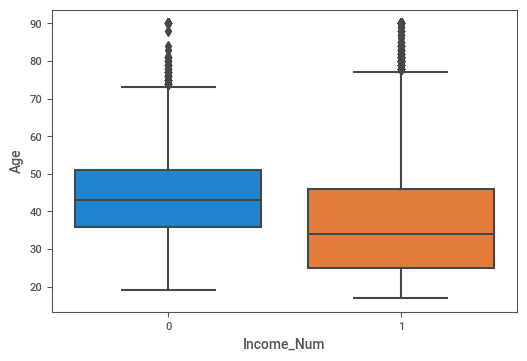

In [ ]:
sns.boxplot(x = 'Income_Num', y = 'Age', data = data)

In [ ]:
outliers=[]
def detect_outliers(data):
  threshold=3
  mn=np.mean(data)
  std=np.std(data)
  #print(mn,std)

  for val in data:
    zscore=(val-mn)/std
    #print(np.abs(zscore))
    if np.abs(zscore)>threshold:
      outliers.append(val)
  return outliers

In [ ]:
detect_outliers(data['Age'])

[90.0,
 80.0,
 81.0,
 90.0,
 88.0,
 90.0,
 90.0,
 80.0,
 81.0,
 82.0,
 81.0,
 80.0,
 90.0,
 90.0,
 81.0,
 90.0,
 90.0,
 80.0,
 90.0,
 80.0,
 81.0,
 83.0,
 84.0,
 85.0,
 80.0,
 90.0,
 90.0,
 84.0,
 80.0,
 84.0,
 90.0,
 90.0,
 90.0,
 90.0,
 82.0,
 81.0,
 90.0,
 84.0,
 81.0,
 82.0,
 80.0,
 84.0,
 82.0,
 90.0,
 84.0,
 90.0,
 83.0,
 81.0,
 80.0,
 80.0,
 90.0,
 90.0,
 80.0,
 90.0,
 90.0,
 81.0,
 83.0,
 82.0,
 90.0,
 81.0,
 80.0,
 90.0,
 85.0,
 80.0,
 90.0,
 81.0,
 80.0,
 81.0,
 82.0,
 88.0,
 82.0,
 88.0,
 84.0,
 86.0,
 90.0,
 83.0,
 81.0,
 90.0,
 80.0,
 81.0,
 84.0,
 84.0,
 80.0,
 81.0,
 81.0,
 81.0,
 90.0,
 87.0,
 90.0,
 80.0,
 80.0,
 82.0,
 90.0,
 82.0,
 81.0,
 80.0,
 90.0,
 80.0,
 81.0,
 83.0,
 80.0,
 90.0,
 81.0,
 84.0,
 81.0,
 89.0,
 81.0,
 83.0,
 81.0,
 82.0,
 80.0,
 90.0,
 81.0,
 90.0,
 84.0,
 80.0,
 80.0,
 80.0,
 90.0,
 85.0,
 81.0,
 81.0,
 80.0,
 80.0,
 81.0,
 88.0,
 87.0,
 90.0,
 83.0,
 80.0,
 90.0,
 81.0,
 81.0,
 90.0,
 82.0,
 90.0,
 87.0,
 81.0,
 88.0,
 80.0,
 80.0,
 81.0,
 88.0,

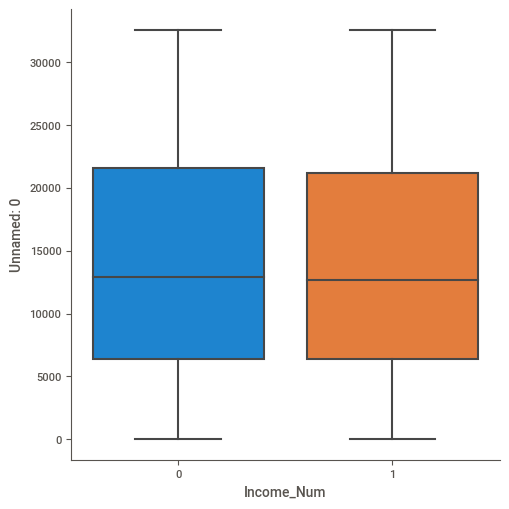

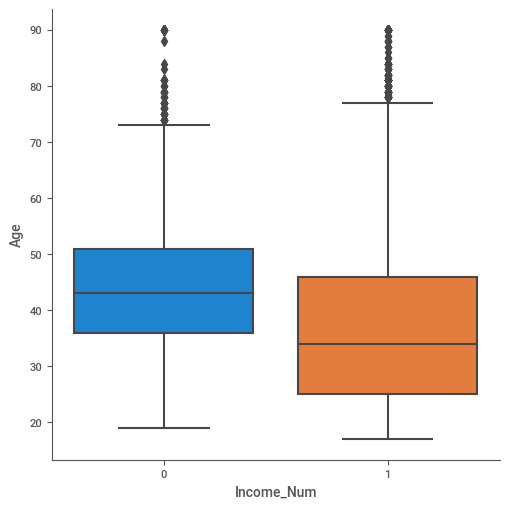

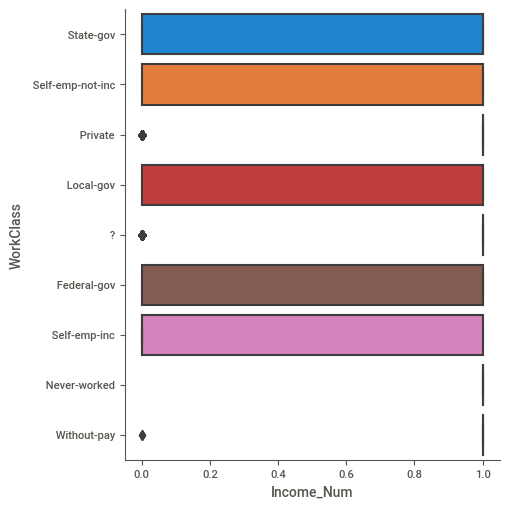

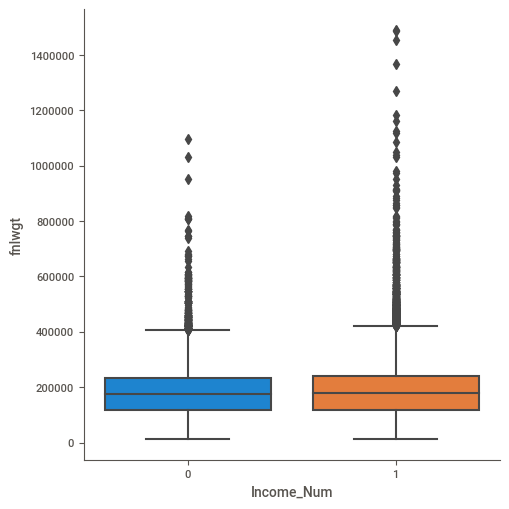

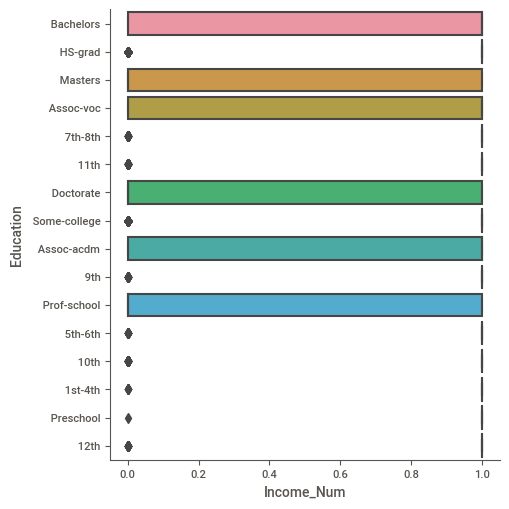

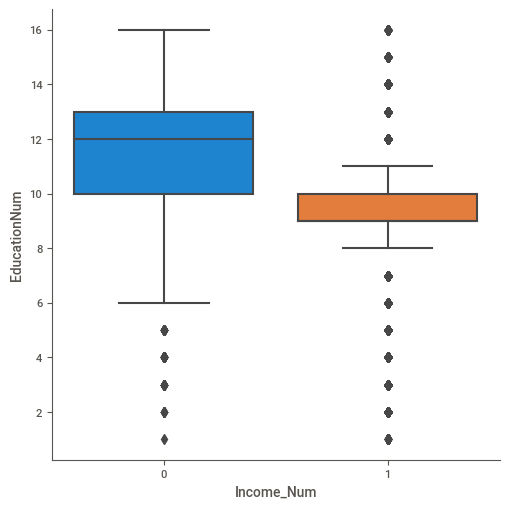

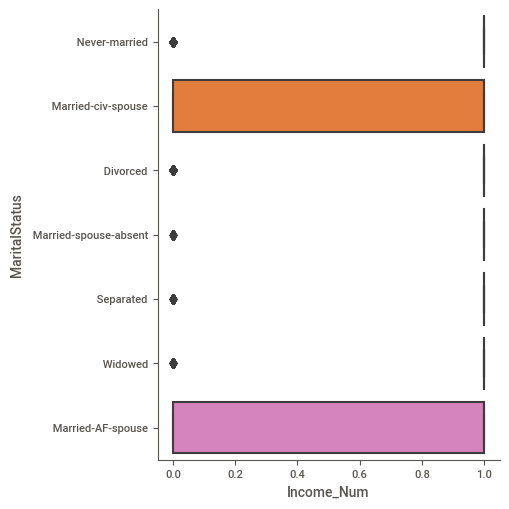

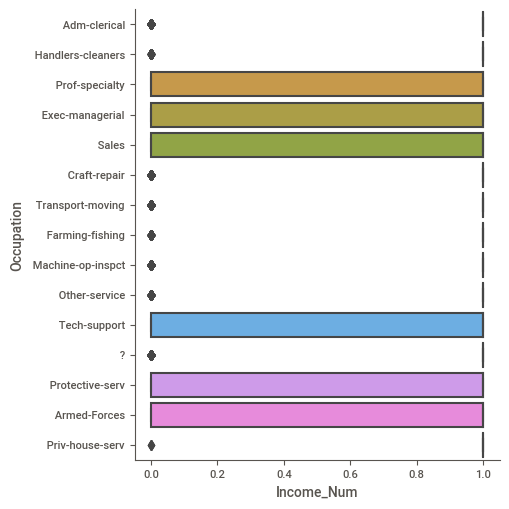

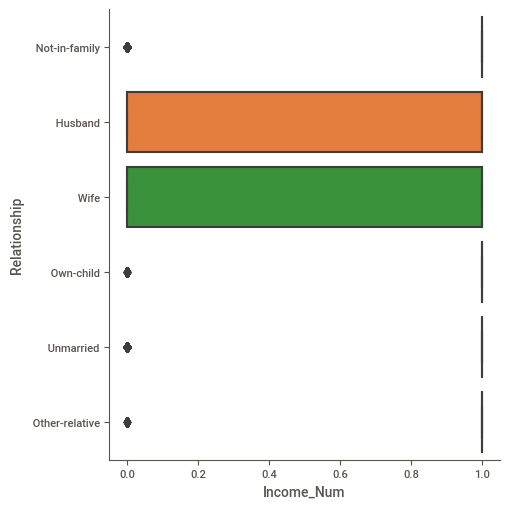

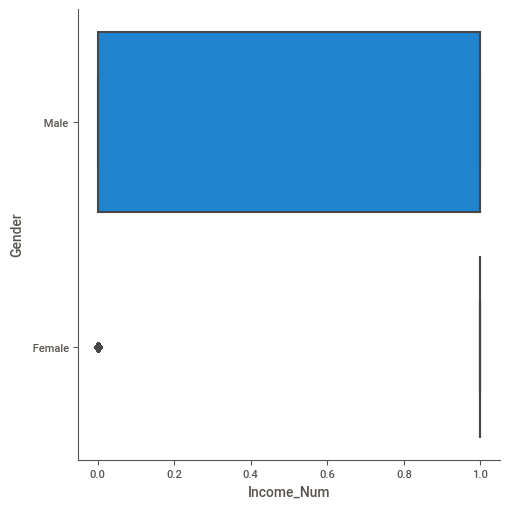

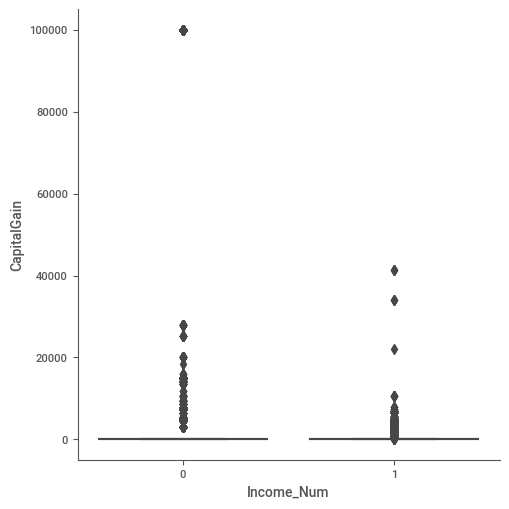

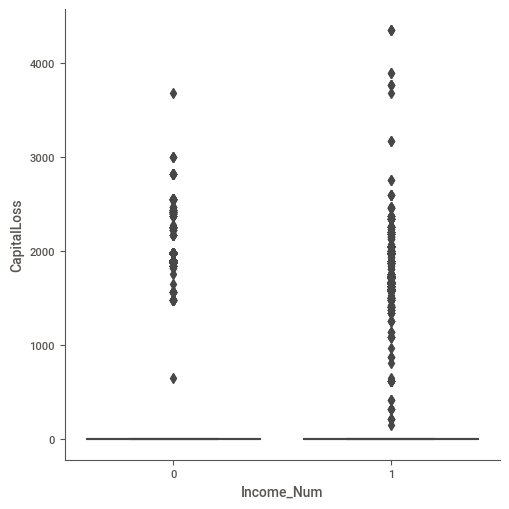

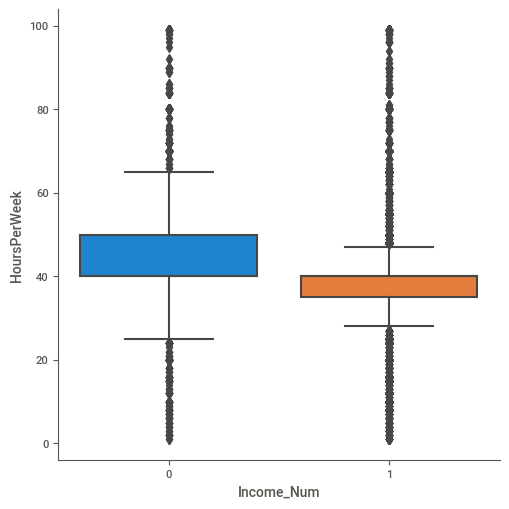

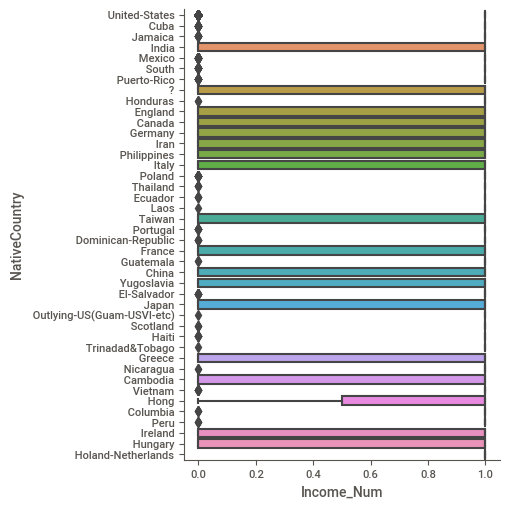

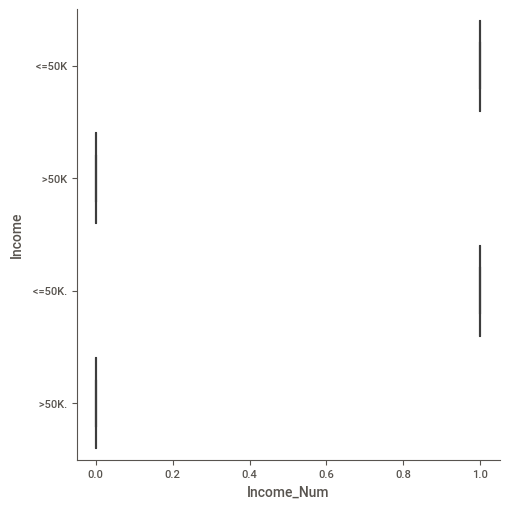

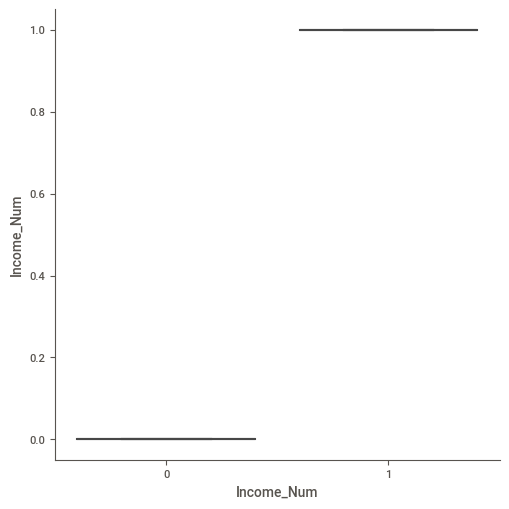

In [ ]:
for feature in data:
  sns.catplot(x = 'Income_Num', y = feature, kind = 'box', data = data)

**Visualization:**

In [ ]:
data.columns

Index(['Unnamed: 0', 'Age', 'WorkClass', 'fnlwgt', 'Education', 'EducationNum',
       'MaritalStatus', 'Occupation', 'Relationship', 'Gender', 'CapitalGain',
       'CapitalLoss', 'HoursPerWeek', 'NativeCountry', 'Income', 'Income_Num'],
      dtype='object')

In [ ]:
data.corr() # it is only for floating values

,Unnamed: 0,Age,fnlwgt,EducationNum,CapitalGain,CapitalLoss,HoursPerWeek,Income_Num
Unnamed: 0,1.000000,-0.002501,0.005900,0.003474,0.001052,0.003083,0.000240,-0.008296
Age,-0.002501,1.000000,-0.082584,0.026326,0.080766,0.056577,0.075471,-0.229408
fnlwgt,0.005900,-0.082584,1.000000,-0.042464,-0.006564,-0.003331,-0.012695,0.008762
EducationNum,0.003474,0.026326,-0.042464,1.000000,0.125579,0.084754,0.141048,-0.331716
CapitalGain,0.001052,0.080766,-0.006564,0.125579,1.000000,-0.031473,0.083450,-0.223208
CapitalLoss,0.003083,0.056577,-0.003331,0.084754,-0.031473,1.000000,0.054264,-0.143843
HoursPerWeek,0.000240,0.075471,-0.012695,0.141048,0.083450,0.054264,1.000000,-0.229320
Income_Num,-0.008296,-0.229408,0.008762,-0.331716,-0.223208,-0.143843,-0.229320,1.000000


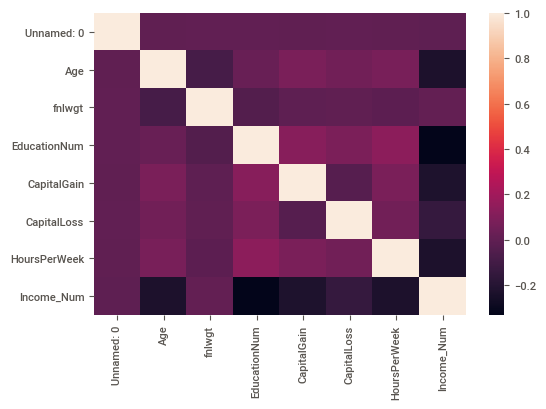

In [ ]:
sns.heatmap(data.corr())

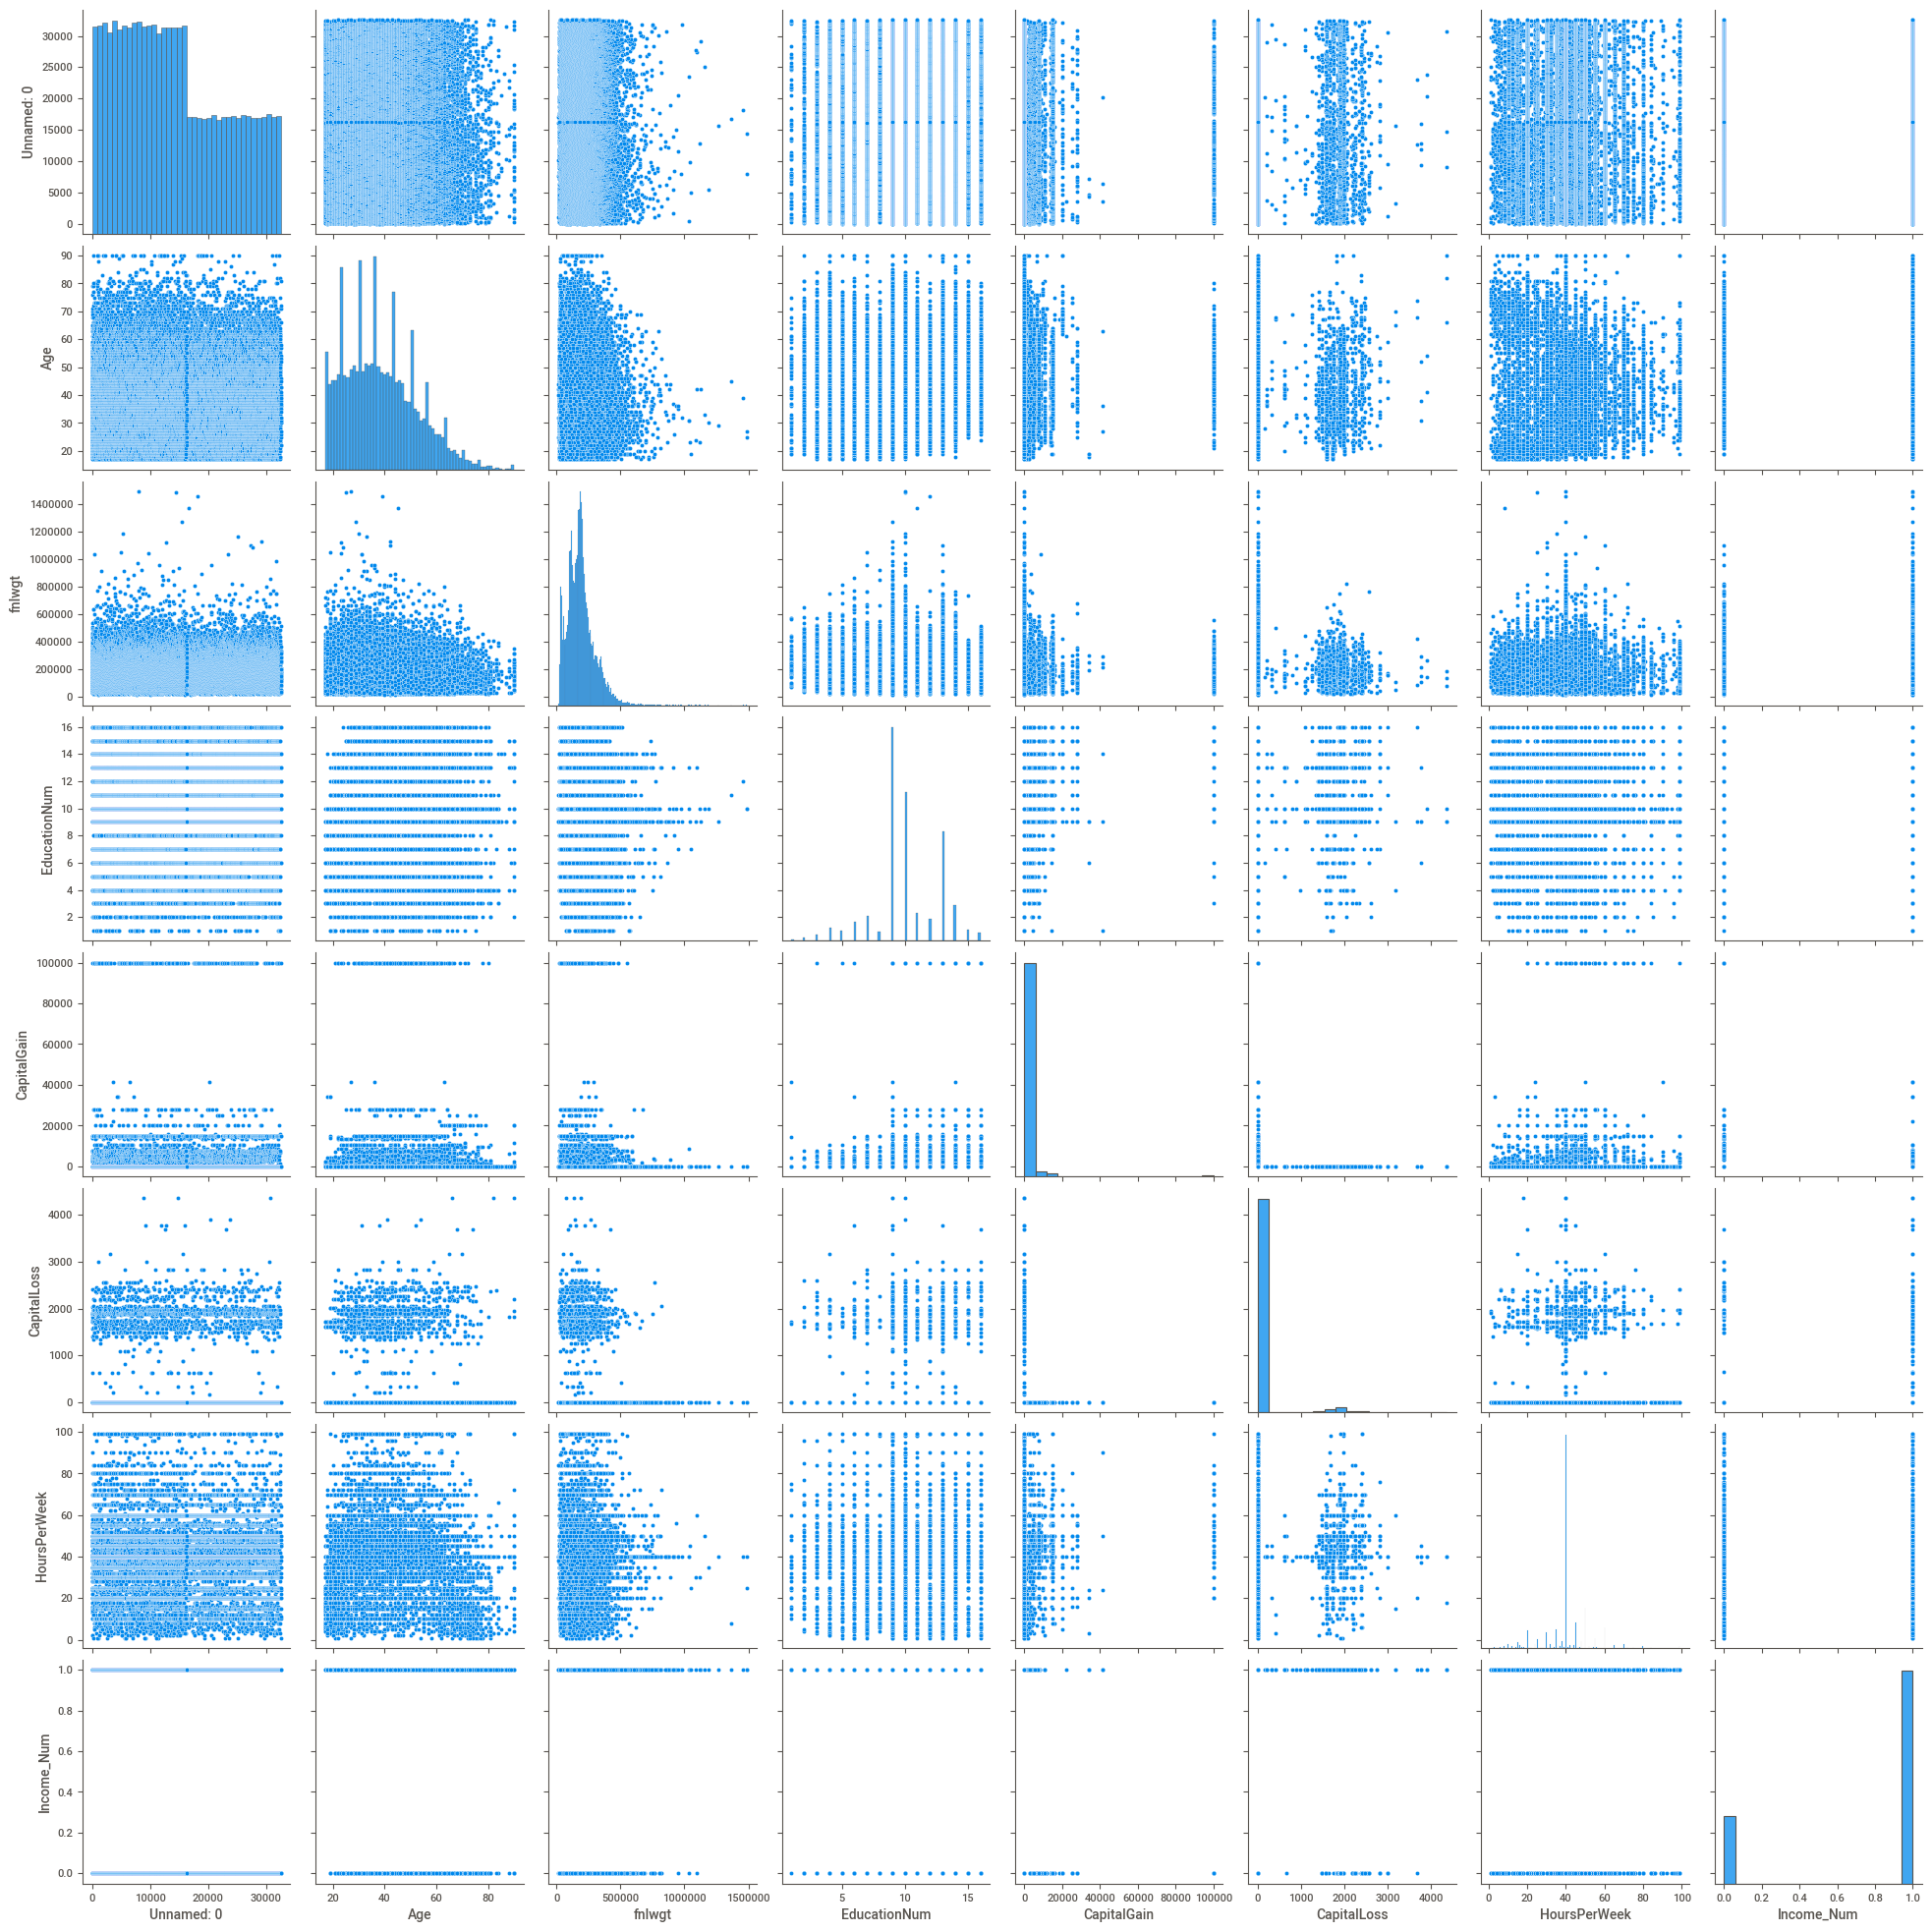

In [ ]:
import seaborn as sns
sns.pairplot(data)

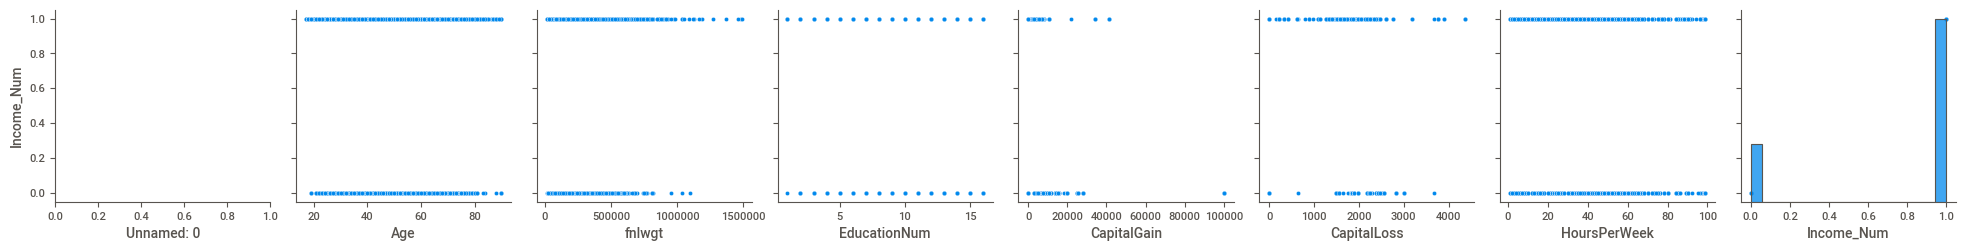

In [ ]:
sns.pairplot(data,y_vars='Income_Num')

Handling Missing Values:

In [ ]:
for feature in features_na:
  

In [ ]:
data

,Unnamed: 0,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income,Income_Num
0,0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,Male,2174.0,0.0,40.0,United-States,<=50K,1
1,1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,NaN,Husband,Male,0.0,0.0,13.0,United-States,<=50K,1
2,2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,Male,0.0,0.0,40.0,United-States,<=50K,1
3,3,53.0,Private,NaN,NaN,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Male,0.0,NaN,40.0,United-States,<=50K,1
4,4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,NaN,0.0,0.0,40.0,Cuba,<=50K,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40930,16276,39.0,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,Female,0.0,0.0,36.0,United-States,<=50K.,1
40931,16277,64.0,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Male,0.0,0.0,40.0,United-States,<=50K.,1
40932,16278,38.0,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,Male,0.0,0.0,50.0,United-States,<=50K.,1
40933,16279,44.0,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Male,5455.0,0.0,40.0,United-States,<=50K.,1


In [ ]:
data['Unnamed: 0'].value_counts()

4094     2
7341     2
1166     2
3215     2
13480    2
        ..
21779    1
27924    1
25877    1
21799    1
28519    1
Name: Unnamed: 0, Length: 27840, dtype: int64

In [ ]:
data['WorkClass'].value_counts()

 Private             26529
 Self-emp-not-inc     2962
 Local-gov            2443
 ?                    2222
 State-gov            1544
 Self-emp-inc         1314
 Federal-gov          1107
 Without-pay            16
 Never-worked            9
Name: WorkClass, dtype: int64

In [ ]:
train=data.copy()

In [ ]:
# data=data.drop_duplicates(subset=['Age','WorkClass'])

In [ ]:
data

,Unnamed: 0,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,Male,2174.0,0.0,40.0,United-States,<=50K
1,1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,NaN,Husband,Male,0.0,0.0,13.0,United-States,<=50K
2,2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,Male,0.0,0.0,40.0,United-States,<=50K
3,3,53.0,Private,NaN,NaN,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Male,0.0,NaN,40.0,United-States,<=50K
4,4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,NaN,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6224,7720,84.0,Private,241065.0,Masters,14.0,Never-married,Prof-specialty,Not-in-family,Male,0.0,0.0,66.0,United-States,<=50K
6767,8381,85.0,Private,115364.0,HS-grad,9.0,Widowed,Sales,Unmarried,Male,NaN,NaN,35.0,United-States,<=50K
20075,24027,86.0,NaN,NaN,Masters,14.0,Never-married,Adm-clerical,Not-in-family,Female,0.0,0.0,40.0,United-States,<=50K
26810,31432,87.0,?,90338.0,NaN,9.0,Widowed,?,Not-in-family,Male,0.0,0.0,NaN,United-States,<=50K


**Feature_Engineering**

In [ ]:
data.head()

,Unnamed: 0,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income,Income_Num
0,0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,Male,2174.0,0.0,40.0,United-States,<=50K,1
1,1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,NaN,Husband,Male,0.0,0.0,13.0,United-States,<=50K,1
2,2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,Male,0.0,0.0,40.0,United-States,<=50K,1
3,3,53.0,Private,NaN,NaN,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Male,0.0,NaN,40.0,United-States,<=50K,1
4,4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,NaN,0.0,0.0,40.0,Cuba,<=50K,1


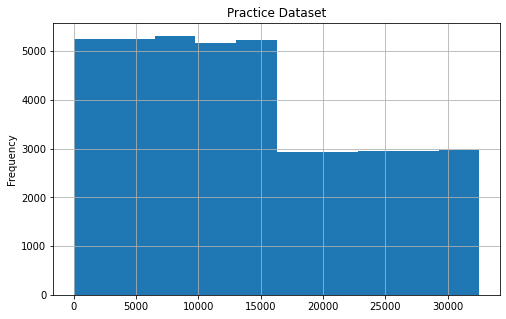

In [ ]:
data['Unnamed: 0'].plot(kind='hist',figsize=(8,5), title='Practice Dataset',grid=bool,xlabel='Unnamed: 0')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


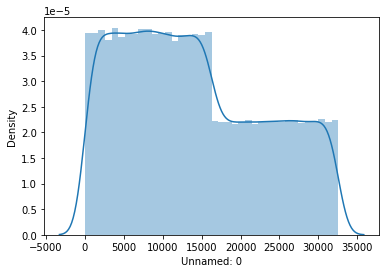

In [ ]:
sns.distplot(data['Unnamed: 0']) 

# Hence Unnamed: 0 is not required

In [ ]:
df=data.iloc[:,1:]
df.head()

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income,Income_Num
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,Male,2174.0,0.0,40.0,United-States,<=50K,1
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,NaN,Husband,Male,0.0,0.0,13.0,United-States,<=50K,1
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,Male,0.0,0.0,40.0,United-States,<=50K,1
3,53.0,Private,NaN,NaN,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Male,0.0,NaN,40.0,United-States,<=50K,1
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,NaN,0.0,0.0,40.0,Cuba,<=50K,1


In [ ]:
df['Age'].value_counts().sort_values()

86.0       1
89.0       2
85.0       3
87.0       3
88.0       6
        ... 
35.0    1033
37.0    1035
33.0    1037
23.0    1042
36.0    1048
Name: Age, Length: 74, dtype: int64

In [ ]:
df['Age'].isnull().sum()

2741

In [ ]:
np.array(df['Age'].notnull())

array([ True,  True,  True, ...,  True,  True,  True])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


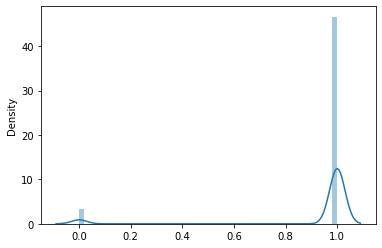

In [ ]:
sns.distplot(np.array(df['Age'].notnull()))

In [ ]:
median_age=df['Age'].median()
median_age

37.0

In [ ]:
for val in df['Age']:
  df['Age_New']=np.where(df['Age'].isnull(),median_age,df['Age'])

In [ ]:
df.drop(['Age'],inplace=True,axis=1)

In [ ]:
df.head()

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income,Income_Num
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,Male,2174.0,0.0,40.0,United-States,<=50K,1
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,NaN,Husband,Male,0.0,0.0,13.0,United-States,<=50K,1
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,Male,0.0,0.0,40.0,United-States,<=50K,1
3,53.0,Private,NaN,NaN,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Male,0.0,NaN,40.0,United-States,<=50K,1
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,NaN,0.0,0.0,40.0,Cuba,<=50K,1


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


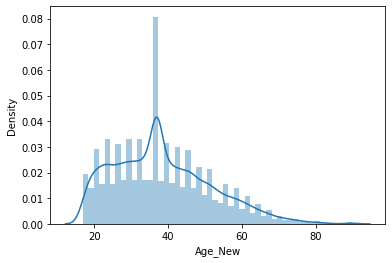

In [ ]:
sns.distplot(df['Age_New'])

In [ ]:
df_num=data[features_numeric].iloc[:,1:]

In [ ]:
df.head()

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income,Income_Num
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,Male,2174.0,0.0,40.0,United-States,<=50K,1
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,NaN,Husband,Male,0.0,0.0,13.0,United-States,<=50K,1
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,Male,0.0,0.0,40.0,United-States,<=50K,1
3,53.0,Private,NaN,NaN,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Male,0.0,NaN,40.0,United-States,<=50K,1
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,NaN,0.0,0.0,40.0,Cuba,<=50K,1


In [ ]:
temp=df.copy()

In [ ]:
df=temp.copy()
df.head()

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income,Income_Num
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,Male,2174.0,0.0,40.0,United-States,<=50K,1
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,NaN,Husband,Male,0.0,0.0,13.0,United-States,<=50K,1
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,Male,0.0,0.0,40.0,United-States,<=50K,1
3,53.0,Private,NaN,NaN,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Male,0.0,NaN,40.0,United-States,<=50K,1
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,NaN,0.0,0.0,40.0,Cuba,<=50K,1


In [ ]:
temp=df.iloc[:,:-1]
temp.head()

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,NaN,Husband,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,NaN,NaN,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Male,0.0,NaN,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,NaN,0.0,0.0,40.0,Cuba,<=50K


In [ ]:
for feature in df_num:
  median=df_num[feature].median()
  print(feature)
  df[feature +'_New']=np.where(df[feature].isnull(),median,df[feature])

Age
fnlwgt
EducationNum
CapitalGain
CapitalLoss
HoursPerWeek
Income_Num


In [ ]:
data[features_numeric].isnull().sum()

Unnamed: 0         0
Age             2741
fnlwgt          2786
EducationNum    2803
CapitalGain     2806
CapitalLoss     2718
HoursPerWeek    2680
Income_Num         0
dtype: int64

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Ecommerce/E commerce Project/Data_ecommerce project.csv')
df1.head()

,ORDERTYPE,CUSTOMER,ITEMCODE,ORDERDATE,ORDERNO,OREDEREDQUANTITY,DELIVERYDATE,INVOICENO,DELIVEREDQUANTITY
0,ES1,C00237,IT0001433,15-JAN-2014 12.00.00.000000000 AM,219856,15.0,16-FEB-2014 12.00.00.000000000 AM,21300726,15.0
1,ES1,C00237,IT0001016,15-JAN-2014 12.00.00.000000000 AM,219857,750.0,11-FEB-2014 12.00.00.000000000 AM,21300626,750.0
2,ES1,C00237,IT0001024,15-JAN-2014 12.00.00.000000000 AM,219857,320.0,16-FEB-2014 12.00.00.000000000 AM,21300727,320.0
3,ES1,C00237,IT0001084,15-JAN-2014 12.00.00.000000000 AM,219857,250.0,11-FEB-2014 12.00.00.000000000 AM,21300626,250.0
4,ES3,C00196,IT0001076,27-MAR-2014 12.00.00.000000000 AM,255311,250.0,28-MAR-2014 12.00.00.000000000 AM,21301499,250.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


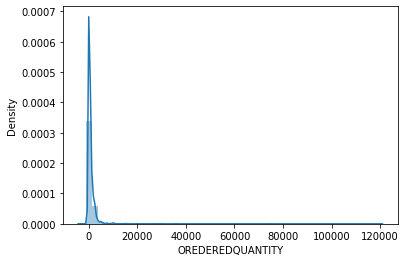

In [ ]:
sns.distplot(df1['OREDEREDQUANTITY'])

In [ ]:
df1.corr()

,ORDERNO,OREDEREDQUANTITY,INVOICENO,DELIVEREDQUANTITY
ORDERNO,1.000000,0.066712,0.196504,0.059386
OREDEREDQUANTITY,0.066712,1.000000,-0.010693,0.740971
INVOICENO,0.196504,-0.010693,1.000000,-0.018813
DELIVEREDQUANTITY,0.059386,0.740971,-0.018813,1.000000


In [ ]:
#scipy toolkit = scikit

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC